<a href="https://colab.research.google.com/github/schahor/TU_25_SS_Data-Mining-und-Maschinelles-Lernen-2025/blob/main/01_Loesung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importieren der benötigten Libraries
from sklearn.datasets import make_blobs, load_digits
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines

# Aufgabe 1.2 Klassifikation

## a) Datensatzerstellung
Erstellen Sie einen synthetischen Datensatz zweier gaußverteilten Cluster.
Der Datensatz soll dabei insgesamt *500 Stichproben* besitzen und die Clusterzentren in den Punkten *(−1.5, −1.5)* und *(1.5, 1.5)* liegen.
Sie können hierfür die Funktion [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) verwenden. Eine Visualisierung der generierten Daten kann z.B. über [matplotlib.pyplit.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) vorgenommen werden.

In [ ]:
# Datensatz erstellen bestehend aus Datenpunkten X und Labels y
X, y = make_blobs(n_samples=500, n_features=2, centers=[(-1.5, -1.5), (1.5, 1.5)])

In [ ]:
# 500 Datenpunkt mit jeweils zwei Features
print('Dimension: ', X.shape)
print('Die ersten fünf Beispiele:\n', X[:5])

Dimension:  (500, 2)
Die ersten fünf Beispiele:
 [[-2.14627481 -1.80740112]
 [ 1.55553367  2.10136691]
 [ 3.26451077  1.26356923]
 [ 2.46742687  0.22250529]
 [ 1.37920148  1.25292393]]


In [ ]:
# 500 diskrete Labels
print('Dimension: ', y.shape)
print('Die ersten fünf Labels:\n', y[:5])

Dimension:  (500,)
Die ersten fünf Labels:
 [0 1 1 1 1]


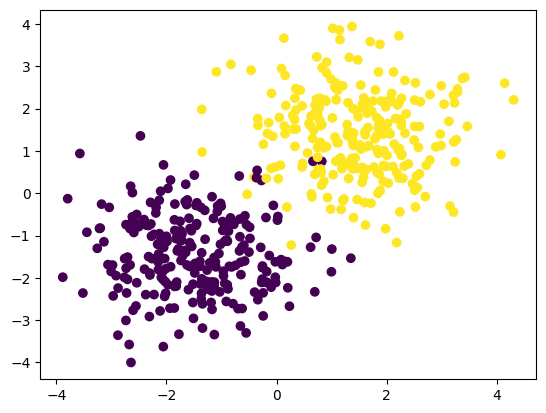

In [ ]:
# visualisierung der generierten Daten mit Labels
plt.scatter(X[:, 0], X[:, 1], c=y)

## b) Einfache Vorhersage

Unser Ziel ist es zu bestimmen, ob ein Datenpunkt der Klasse A ($\hat{y}=0$) oder B ($\hat{y}=1$) angehört. Aus der Betrachtung der Daten könnten wir einige handgeschriebene Regeln ableiten.
Weisen Sie einen Datenpunkt der Klasse A in der Funktion ```predict_1(x)``` zu, wenn er sich im dritten Quadranten (unter der x-Achse und links der y-Achse) befindet.
Alle anderen Punkte werden der Klasse B zugewiesen.

In [ ]:
def predict_1(x: np.ndarray) -> int:
  # Prüfe ob der Datenpunkt x im dritten Quadranten liegt
  if x[0] < 0.0 and x[1] < 0.0:
    return 0 # Class A
  else:
    return 1 # Class B

Wir verwenden nun die definierte Funktion ```predict_1(x)``` um eine Vorhersage für jeden Datenpunkt $x\in X$ zu treffen. Dies geschieht in diesem Fall über eine for-Schleife. Vorhersagen werden in einer Liste gesammelt und anschließend in ein Numpy-Array konvertiert, welches sich zur Berechnung von Metriken besser eignet.

Hinweis: Bei größeren Datenmengen werden in der Regel die Datenpunkte nicht einzeln über Schleifen verarbeitet, sondern in größeren Gruppen, sogenannten Batches. Dies erhöht die Verarbeitungsgeschwindigkeit und lastet vorhandene Hardware besser aus.

In [ ]:
y_pred = [] # Liste zum Speichern der einzelnen Vorhersagen
for x in X: # iteriere über einzelne Datenpunkte aus X
  prediction = predict_1(x) # bestimme Vorhersage
  y_pred.append(prediction) # füge Vorhersage zur Liste hinzu
y_pred = np.array(y_pred) # Erstelle Numpy-Array aus Liste
y_pred[:10] # Ausgabe der ersten 10 Vorhersagen

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [ ]:
# alternative Implementierung ohne Schleife
# Liefert True, wenn ein Datenpunkt nicht im dritten Quadranten liegt
y_pred_alt = np.logical_not(np.logical_and(X[:, 0] < 0.0, X[:, 1] < 0.0))
y_pred_alt = y_pred_alt.astype(int) # Konvertiere Boolean zu Integer
y_pred_alt[:10] # Ausgabe der ersten 10 Vorhersagen

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1])

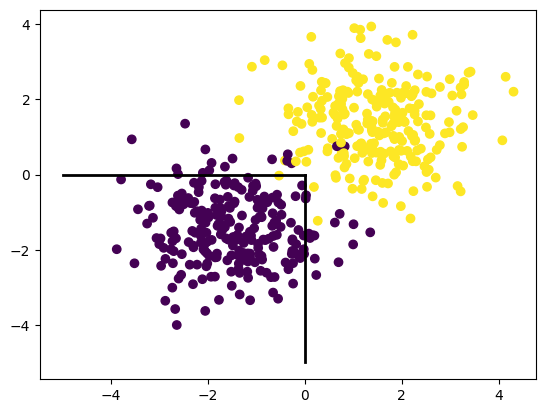

In [ ]:
# visualisierung der generierten Daten mit Labels und Entscheidungsgrenzen
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot([-5, 0], [0, 0], color='black', lw=2)
plt.plot([0, 0], [0, -5], color='black', lw=2)

## c) Genauigkeit
Implementieren Sie die Funktion ```accuracy(y_true, y_pred)```, um die Genauigkeit unserer Vorhersagefunktion zu bestimmen.

In [ ]:
def accuracy(y_true: np.ndarray, y_pred: np.ndarray) -> float:
  """Berechne die Genauigkeit (Accuracy) der Vorhersagen y_pred bzgl. den korrekten Labels y_true"""
  num_correct = 0 # Zähler
  num_total = y.shape[0] # Anzahl an Vorhersagen
  for y_i, y_i_pred in zip(y, y_pred):
    # Zähle korrekte Vorhersagen
    if y_i == y_i_pred:
      num_correct += 1
  # Berechnet Genauigkeit
  acc = num_correct / num_total * 100
  return acc

In [ ]:
# alternative Implementierung ohne Schleife
def accuracy_alternative(y_true: np.ndarray, y_pred: np.ndarray) -> float:
  """Berechne die Genauigkeit (Accuracy) der Vorhersagen y_pred bzgl. den korrekten Labels y_true"""
  return (y_true == y_pred).sum() / len(y) * 100

Berechnung der Genauigkeit für ```predict_1```. Über den _magic command_ ```%%time``` am Anfang einer Zelle lässt sich die Ausführungsdauer der Befehle in einer Zelle schätzen.

In [ ]:
%%time
accuracy(y, y_pred)

CPU times: user 294 µs, sys: 0 ns, total: 294 µs
Wall time: 1.14 ms


93.8

In [ ]:
%%time
accuracy_alternative(y, y_pred)

CPU times: user 63 µs, sys: 10 µs, total: 73 µs
Wall time: 76.3 µs


93.8

## d) Verbesserte Vorhersage

Wir können nun die Vorhersagefunktion verfeinern und z.B. sagen, dass alles unterhalb der Diagonalen ($-x_0 = x_1$) zur Klasse A gehört und sonst zur Klasse B. Implementieren Sie diese Regel in der Funktion ```predict_2(x)```.


In [ ]:
def predict_2(x: np.ndarray) -> float:
  if -x[0] > x[1]:
    return 0 # Class A
  else:
    return 1 # Class B

In [ ]:
y_pred_2 = []
for x in X:
  prediction = predict_2(x)
  y_pred_2.append(prediction)
y_pred_2 = np.array(y_pred_2)
y_pred_2[:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
accuracy(y, y_pred_2)

98.4

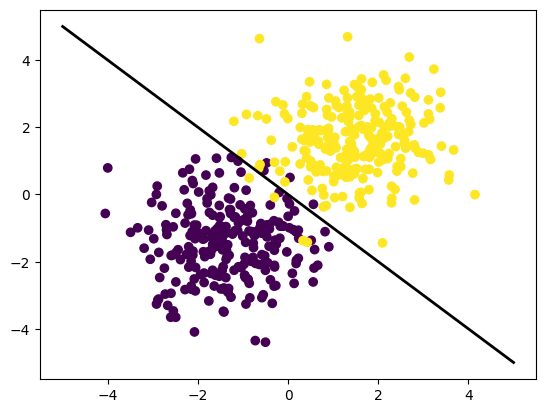

In [ ]:
# Visualisierung der generierten Daten mit Labels und Entscheidungsgrenzen
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot([-5, 5], [5, -5], color='black', lw=2)

# Aufgabe 1.3 Regression

Bei einer Regressionsaufgabe (mit einer Zielvariable) ist die Zielvariable kontinuierlich
($y_i \in \mathbb{R}$).
Dies unterscheidet sich sehr von der früheren Klassifizierungsstruktur, da wir jetzt nicht einfach unsere Daten in Klassen trennen und Entscheidungsgrenzen finden können, um die Klassen zu trennen.

Ein einfaches Beispiel ist die lineare Regression, bei der wir annehmen, dass die Daten $\mathbf{x_i}$
linear mit der Zielvariablen
$y_i$
korreliert sind, wobei wir Koeffizienten $\beta_0, \dots, \beta_{K} \in \mathbb{R}$ verwenden:
\begin{equation}
     y_i = \beta_0 + \beta_1 x_i^1 + \beta_2 x_i^2 + \dots + \beta_{K} x_i^{K}
\end{equation}

und der Superskript den jeweiligen Eingangsvariablen-Index beschreibt.

Für den zweidimensionalen Fall reduziert sich dies auf den klassischen Fall
$ y_i = \beta_0 + \beta_1x_i$.

In [ ]:
np.random.seed(42) # Seed setzen, damit Datengenerierung deterministisch ist
data = np.random.multivariate_normal(mean=[5, 5], cov=[[3, 8], [4, 8]], size=500)
outlier = np.random.multivariate_normal(mean=[7, 17], cov=[[2, 1], [1, 2]], size=50)
X = np.concatenate([data[:, 0], outlier[:, 0]]) # Interpretiere erste Dimension als unabhängige Variable (Daten)
y = np.concatenate([data[:, 1], outlier[:, 1]]) # Interpretiere zweite Dimension als abhängige Variable (Vorhersagewert)

<ipython-input-451-64d081034048>:2: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean=[5, 5], cov=[[3, 8], [4, 8]], size=500)


## a) Datensatzvisualisierung

Schreiben Sie eine Methode ```visualize_data(X, y)```, um den generierten Datensatz als Scatter-Plot zu visualisieren.. Verwenden Sie dabei die [Matplotlib](https://matplotlib.org/stable/index.html) Bibliothek und beschriften Sie die x- und y-Achse.

In [ ]:
def visualize_data(X: np.ndarray, y: np.ndarray) -> None:
  """Visualisieurng der Datenpunkte als Scatter-Plot"""
  plt.scatter(X, y, label='Data')
  plt.xlabel('Datenvariable $X$')
  plt.ylabel('Zielvariable $y$')
  plt.legend()
  plt.show()

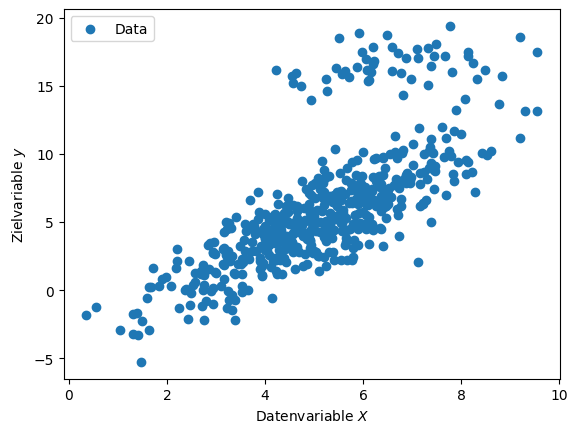

In [ ]:
visualize_data(X, y)

## b) Regressionsermittlung

Die Regressionskoeffizienten können über folgende Formal bestimmt werden: $\mathbf{\hat{\beta}} =
( \mathbf{X'}^T \mathbf{X'})^{-1} \mathbf{X'}^T\mathbf{y} \, ,
$
wobei $\mathbf{X}$ um eine Spalte mit Einsen ergänzt wird ($\mathbf{X'} = [\mathbf{1}, \mathbf{X}]$), um die Verschiebung an der y-Achse $\beta_0$ zu berücksichtigen.


Berechnen Sie in ```perform_linear_regression()``` die Regressionskoeffizienten
 $\hat{\beta}$ mithilfe der Methode der kleinsten Quadrate (KQ-Schätzer).

In [ ]:
def estimate_beta(X: np.ndarray, y: np.ndarray) -> np.ndarray:
  """Schätzen der Regressionsgeraden beta_hat"""
  X = X.reshape(X.shape[0], 1) # Konvertiere 1D-Liste in 2D-Array (zweite Dimension hat Länge 1)
  ones = np.ones_like(X) # Erstelle zweites Array gefüllt mit 1er
  X_ext = np.hstack([ones, X]) # Füge beide Arrays zusammen
  beta_hat = np.linalg.inv(X_ext.T @ X_ext) @ X_ext.T @ y # Berechne KQ-Schätzer
  return beta_hat

In [ ]:
beta_hat = estimate_beta(X, y)
beta_hat

array([-4.49742072,  2.03846183])

## c) Vorhersage
Neue Vorhersagen können wir nun wie folgt erhalten: $\mathbf{\hat{y}} = \mathbf{X'} \mathbf{\hat{\beta}} \, .$

Verwenden Sie das berechnete $\hat{\beta}$ und geben Sie in ```compute_predictions()``` für jeden Datenpunkt $\mathbf{x_i}$ den zugehörigen Punkt auf der ermittelten Regressionsline $\mathbf{\hat{y_i}}$ an.


In [ ]:
def compute_predictions(X: np.ndarray, beta_hat: np.ndarray) -> np.ndarray:
  """Berechnung der Vorhersagen mithilfe des Linearen Regressionsmodells"""
  X = X.reshape(X.shape[0], 1) # Konvertiere 1D-Liste in 2D-Array (zweite Dimension hat Länge 1)
  ones = np.ones_like(X) # Erstelle zweites Array gefüllt mit 1er
  X_ext = np.hstack([ones, X]) # Füge beide Arrays zusammen
  y_pred = X_ext @ beta_hat # Berechne Vorhersagen
  return y_pred

In [ ]:
y_pred = compute_predictions(X, beta_hat)
X[:10], y_pred[:10]

(array([4.19645484, 5.20740211, 5.15822839, 3.33473154, 6.06299325,
        5.3114253 , 3.24830154, 7.02226485, 6.66229377, 5.241942  ]),
 array([4.05689231, 6.11766973, 6.01743097, 2.30030224, 7.86175961,
        6.32971703, 2.12411799, 9.81719817, 9.08341085, 6.18807797]))

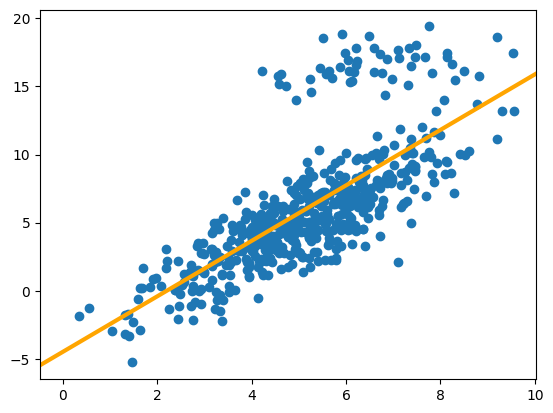

In [ ]:
plt.scatter(X, y)
plt.axline(xy1=(0, beta_hat[0]), slope=beta_hat[1], color='orange', lw=3)

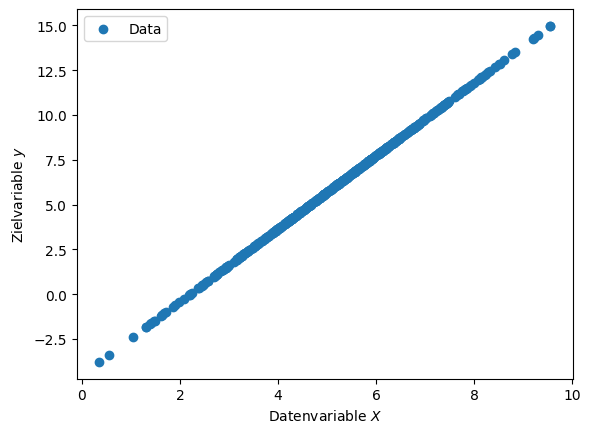

In [ ]:
visualize_data(X, y_pred)

## d) Fehlerbewertung

Berechnen Sie in der Funktion ```compute_mse()``` die mittlere quadratische Abweichung für die ermittelte Funktion zu den Datenpunkten.

In [ ]:
def compute_mse(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
  """Computes the mean squared error."""
  diff = y_true - y_pred # Berechne Differenz
  diff_squared = diff**2 # Quadriere Differenzen
  mse = np.mean(diff_squared) # Berechne den Mittelwert
  return mse

In [ ]:
def compute_mae(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
  """Computes the mean absolute error."""
  diff = y_true - y_pred # Berechne Differenz
  diff_squared = np.abs(diff) # Quadriere Differenzen
  mae = np.mean(diff_squared) # Berechne den Mittelwert
  return mae

In [ ]:
# Berechne mittlere quadratische Abweichung für geschätzte Werte mit selbstimplementierter Funktion
mse = compute_mse(y, y_pred)
mse

9.346848411247734

In [ ]:
# Berechne mittlere quadratische Abweichung für geschätzte Werte mit vorimplementierter Funktion
mean_squared_error(y, y_pred)

9.346848411247734

In [ ]:
# Berechne mittlere absolute Abweichung für geschätzte Werte mit selbstimplementierter Funktion
mae = compute_mae(y, y_pred)
print(f'MSE: {mse:.2f} MAE: {mae:.2f}')

MSE: 9.35 MAE: 2.13


Um die Performance unseres linearen Regressionsmodells besser einschätzen zu können, definieren wir manuell ein zweites Regressionsmodell mit $\hat{\beta}=(-2,57, 1.56)$. Dieses ist weniger von Ausreisern beeinflusst und senkt den MAE zu Kosten des MSE.

In [ ]:
# Definiere ein numpy Array mit den alternativen Gewichten
beta_hat_alternative = np.array([-2.57, 1.56])
# Anwendung des neuen Modells um Vorhersagen für y zu berechnen
y_pred_alt = compute_predictions(X, beta_hat_alternative)
# Berechnung der Metriken
mse = compute_mse(y, y_pred_alt)
mae = compute_mae(y, y_pred_alt)
print(f'MSE: {mse:.2f} MAE: {mae:.2f}')

MSE: 10.23 MAE: 2.07


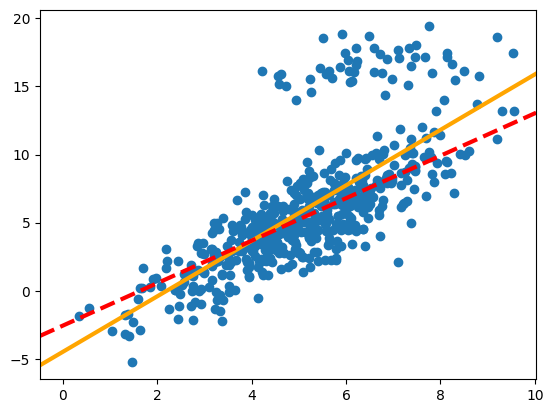

In [ ]:
# Visualisierung der Regressionsgeraden für den KQ-Schätzer (orange) und die alternaitve Schätzung (rot)
plt.scatter(X, y)
plt.axline(xy1=(0, beta_hat[0]), slope=beta_hat[1], color='orange', lw=3)
plt.axline(xy1=(0, beta_hat_alternative[0]), slope=beta_hat_alternative[1], color='red', lw=3, linestyle='--')